In [4]:
import pandas as pd

df = pd.read_csv('USvideos.csv')
df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

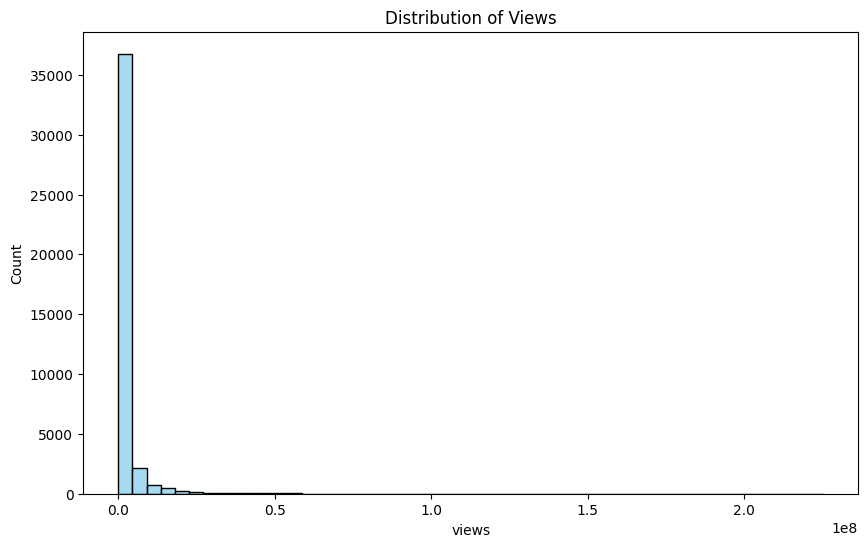

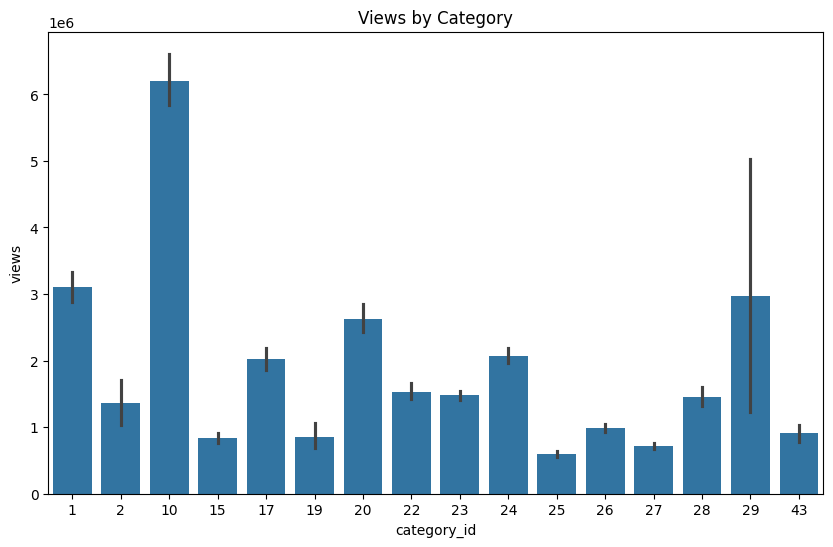

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['views'], bins=50, color='skyblue')
plt.title('Distribution of Views')
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(x='category_id', y='views', data=df)
plt.title('Views by Category')
plt.show()

In [8]:
df['publish_time'] = pd.to_datetime(df['publish_time'])
df['publish_day'] = df['publish_time'].dt.day_name()
df['publish_hour'] = df['publish_time'].dt.hour

In [9]:
df.drop_duplicates(inplace=True)

In [18]:
category_mapping = {
    1: "Film & Animation",
    2: "Autos & Vehicles",
    10: "Music",
    15: "Pets & Animals",
    17: "Sports",
    20: "Gaming",
    22: "People & Blogs",
    23: "Comedy",
    24: "Entertainment",
    25: "News & Politics",
    26: "Howto & Style",
    27: "Education",
    28: "Science & Technology",
    29: "Nonprofits & Activism"
}

In [19]:
df['category_name'] = df['category_id'].map(category_mapping).fillna('Other')

In [20]:
df[['category_id', 'category_name']].head()

,category_id,category_name
0,22,People & Blogs
1,24,Entertainment
2,23,Comedy
3,24,Entertainment
4,24,Entertainment


In [21]:
df.to_csv('processed_data.csv', index=False)

In [11]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///youtube_data.db', echo=False)
df.to_sql('youtube_data', con=engine, if_exists='replace', index=False)

40901

In [12]:
query = '''
SELECT category_id, AVG(views) as avg_views 
FROM youtube_data 
GROUP BY category_id 
ORDER BY avg_views DESC
'''
result = pd.read_sql(query, con=engine)
print(result)

    category_id     avg_views
0            10  6.204776e+06
1             1  3.101917e+06
2            29  2.963884e+06
3            20  2.607598e+06
4            24  2.067689e+06
5            17  2.027262e+06
6            22  1.530550e+06
7            23  1.480239e+06
8            28  1.449088e+06
9             2  1.355965e+06
10           26  9.828614e+05
11           43  9.035273e+05
12           19  8.556125e+05
13           15  8.311435e+05
14           27  7.130972e+05
15           25  5.927930e+05


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = df[['views', 'comment_count']]
target = df['likes']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 8798924788.013992


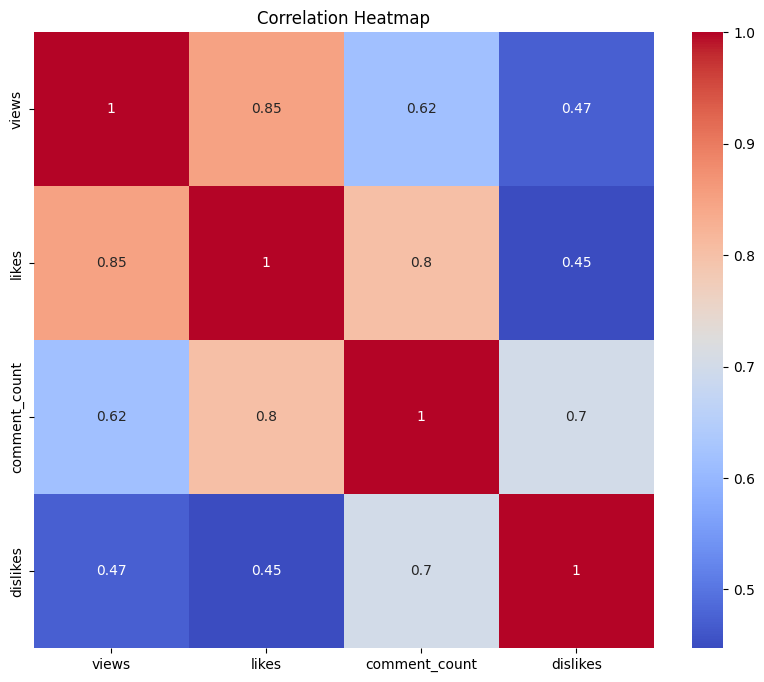

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(df[['views', 'likes', 'comment_count', 'dislikes']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Palak Mehta\AppData\Local\Temp\ipykernel_24828\1405956142.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_channels.values, y=top_channels.index, palette='viridis')


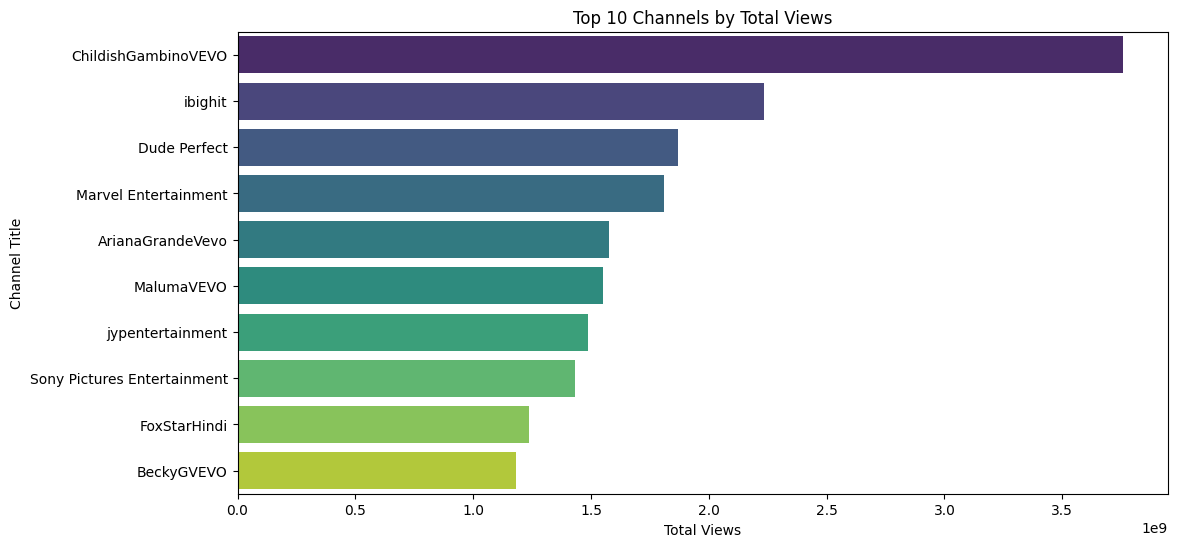

In [15]:
top_channels = df.groupby('channel_title')['views'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_channels.values, y=top_channels.index, palette='viridis')
plt.title('Top 10 Channels by Total Views')
plt.xlabel('Total Views')
plt.ylabel('Channel Title')
plt.show()

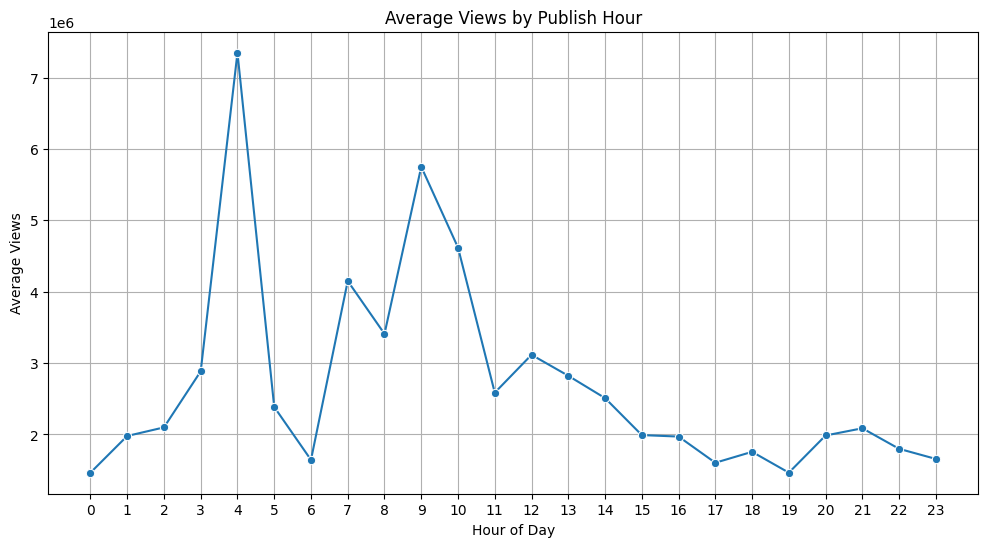

In [16]:
publish_hour = df.groupby('publish_hour')['views'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=publish_hour.index, y=publish_hour.values, marker='o')
plt.title('Average Views by Publish Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Views')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

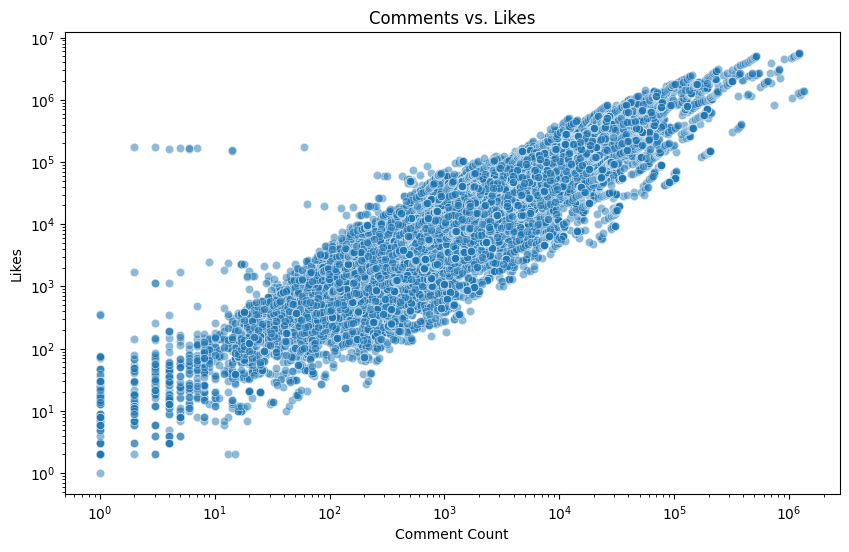

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='comment_count', y='likes', alpha=0.5)
plt.title('Comments vs. Likes')
plt.xlabel('Comment Count')
plt.ylabel('Likes')
plt.xscale('log')
plt.yscale('log')
plt.show()